In [88]:
# نصب کتابخانه‌های لازم
!pip install matplotlib seaborn

In [146]:

# مرحله 1: لود کردن کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# مرحله 2: بارگذاری دیتاست
# اگر دیتاست در Google Drive است، ابتدا Google Drive را متصل کنید
from google.colab import drive
drive.mount('/content/gdrive')

In [90]:
%cd /content/gdrive/MyDrive/SourceKaravi/NTK.Education.Practice/
!git pull
%cd /content/gdrive/MyDrive/SourceKaravi/NTK.Education.Practice/PatternRecognition/RemoteWorkOnMentalHealth/

/content/gdrive/MyDrive/SourceKaravi/NTK.Education.Practice
Already up to date.
/content/gdrive/MyDrive/SourceKaravi/NTK.Education.Practice/PatternRecognition/RemoteWorkOnMentalHealth


In [91]:
# بارگذاری دیتاست (توجه: آدرس فایل خود را وارد کنید)
df = pd.read_csv('/content/gdrive/MyDrive/SourceKaravi/NTK.Education.Practice/PatternRecognition/RemoteWorkOnMentalHealth/Impact_of_Remote_Work_on_Mental_Health.csv')

In [92]:
# مرحله 3: بررسی فیلدهای دیتاست
print(df.head())  # نمایش 5 ردیف اول دیتاست

  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

In [93]:
print(df.info())  # اطلاعات کلی درباره دیتاست

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [94]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [95]:
# تبدیل ستون به نوع int
#df['Work_Location'] = df['Work_Location'].map({'Onsite':1, 'Remote': 2,'Hybrid': 3 })
#df['Work_Location'] = df['Work_Location'].astype(int)
# تبدیل ستون به نوع int
#df['Stress_Level'] = df['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
#df['Stress_Level'] = df['Stress_Level'].astype(int)

In [96]:
df  = df.dropna()

In [97]:
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,2,Low,Burnout,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia


In [98]:
df.shape

(2577, 20)

In [99]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [100]:
df['Age']

,Age
0,32
1,40
6,31
9,30
12,40
...,...
4991,60
4992,55
4994,40
4995,32


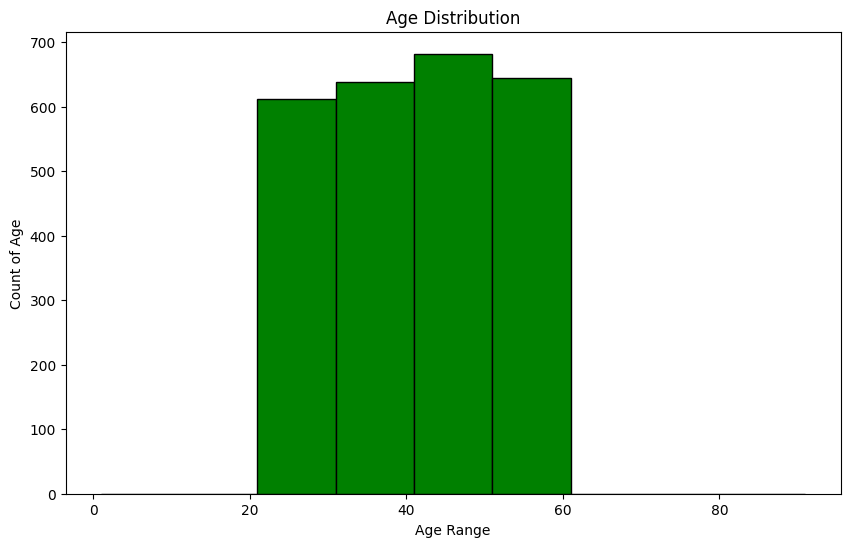

In [101]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'],bins=range(1,101,10),edgecolor='black',color='green')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count of Age')
plt.show()

In [102]:
df['Age'].describe()

,Age
count,2577.000000
mean,40.910749
std,11.258183
min,22.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,60.000000


In [103]:
df['Gender'].unique()

array(['Non-binary', 'Female', 'Prefer not to say', 'Male'], dtype=object)

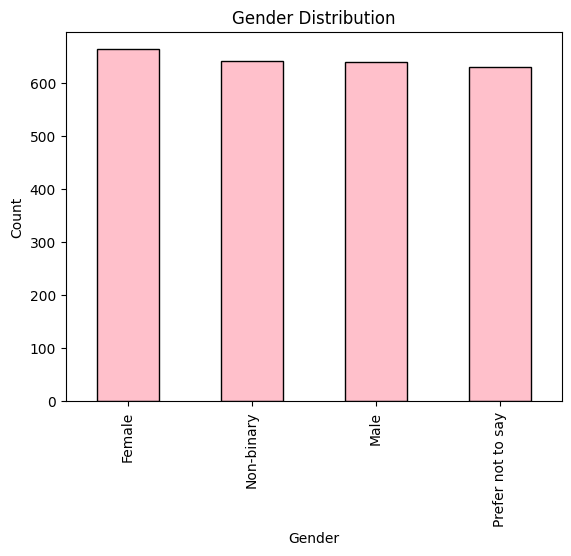

In [104]:
df['Gender'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

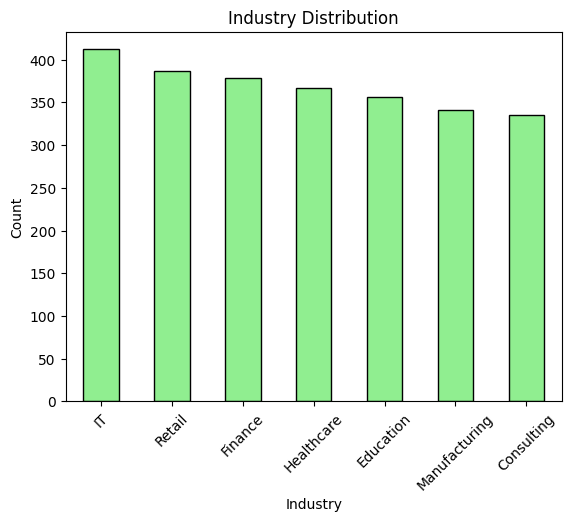

In [105]:
df['Industry'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

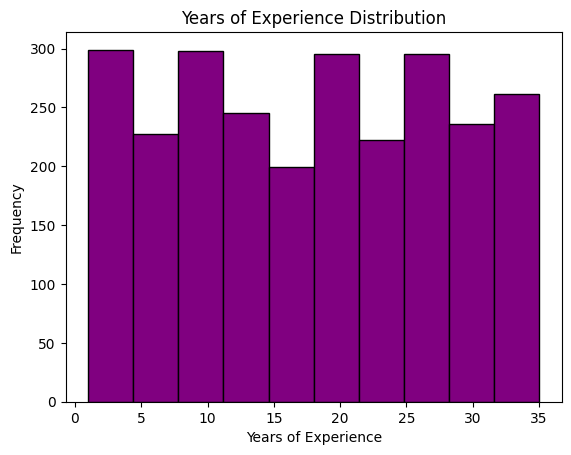

In [106]:
plt.hist(df['Years_of_Experience'], bins=10, color='purple', edgecolor='black')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

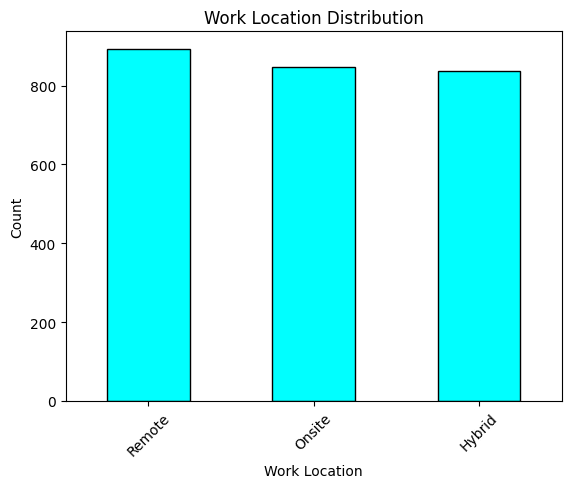

In [107]:
df['Work_Location'].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Work Location Distribution')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

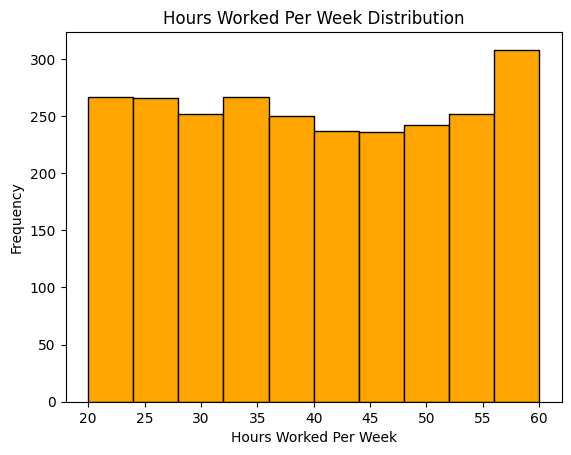

In [108]:
plt.hist(df['Hours_Worked_Per_Week'], bins=10, color='orange', edgecolor='black')
plt.title('Hours Worked Per Week Distribution')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Frequency')
plt.show()

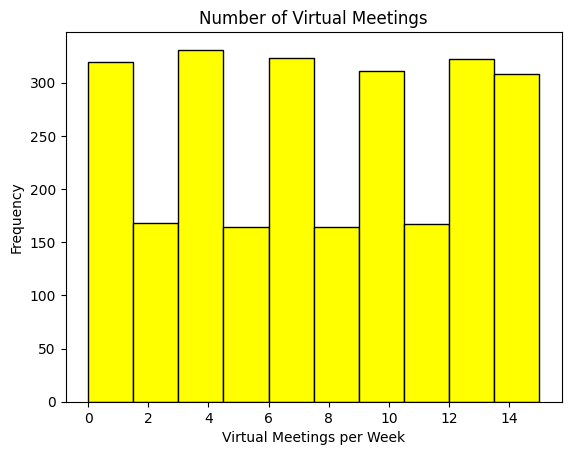

In [109]:
plt.hist(df['Number_of_Virtual_Meetings'], bins=10, color='yellow', edgecolor='black')
plt.title('Number of Virtual Meetings')
plt.xlabel('Virtual Meetings per Week')
plt.ylabel('Frequency')
plt.show()

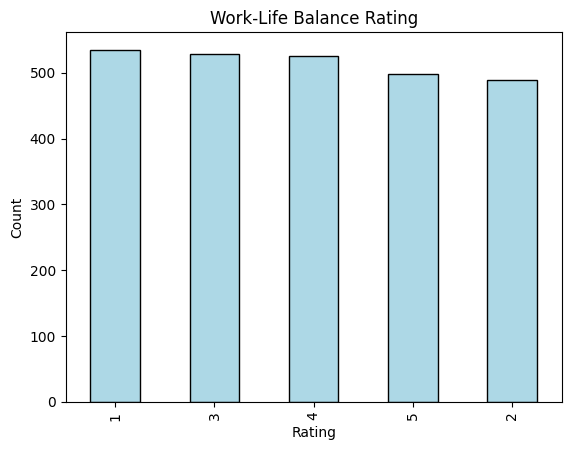

In [110]:
df['Work_Life_Balance_Rating'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Work-Life Balance Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

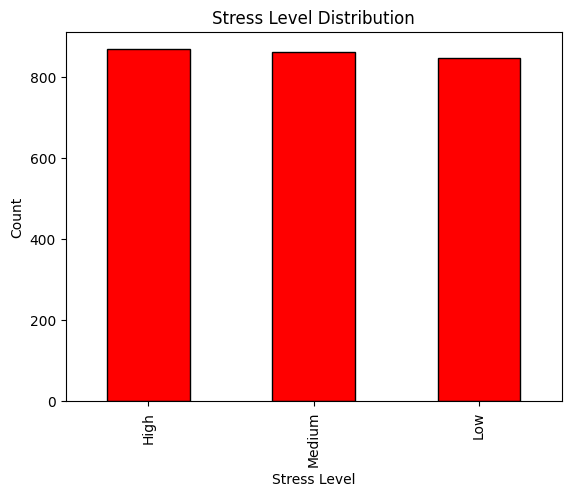

In [111]:
df['Stress_Level'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

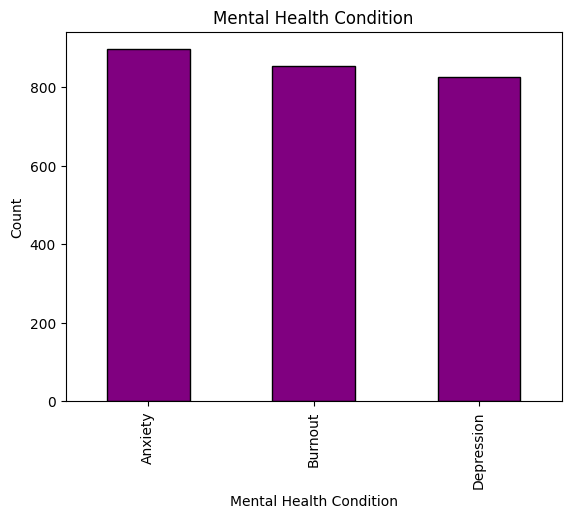

In [112]:
df['Mental_Health_Condition'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

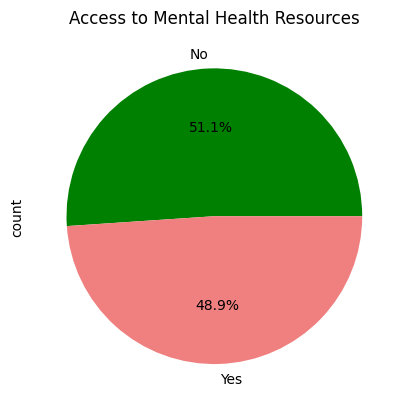

In [113]:
df['Access_to_Mental_Health_Resources'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'lightcoral'])
plt.title('Access to Mental Health Resources')
plt.show()

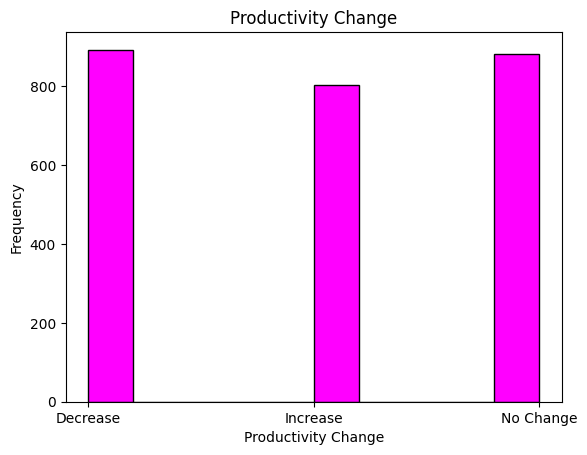

In [114]:
plt.hist(df['Productivity_Change'], bins=10, color='magenta', edgecolor='black')
plt.title('Productivity Change')
plt.xlabel('Productivity Change')
plt.ylabel('Frequency')
plt.show()

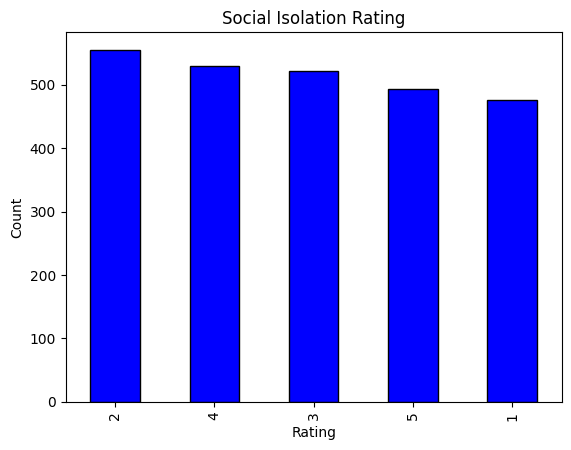

In [115]:
df['Social_Isolation_Rating'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Social Isolation Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

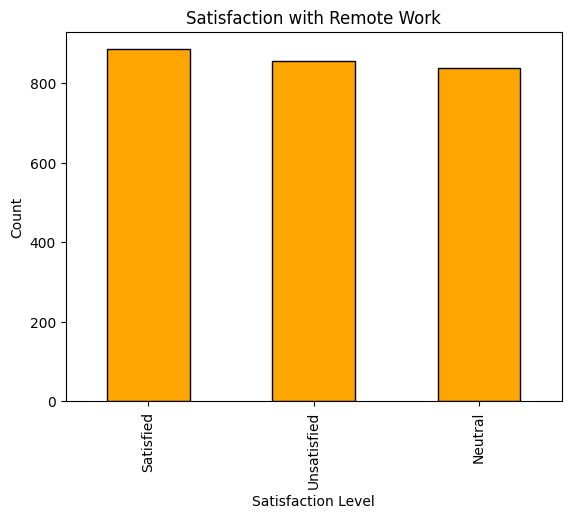

In [116]:
df['Satisfaction_with_Remote_Work'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Satisfaction with Remote Work')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

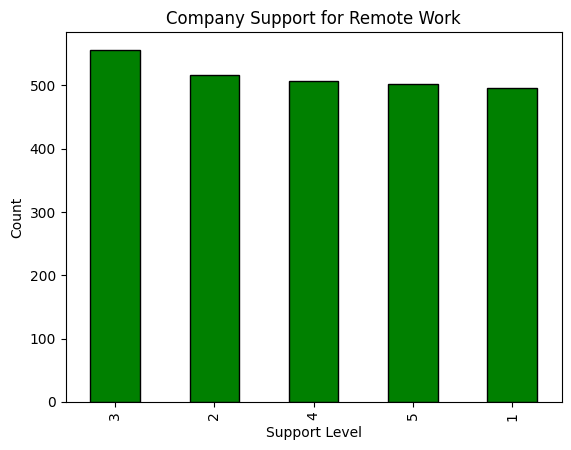

In [117]:
df['Company_Support_for_Remote_Work'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Company Support for Remote Work')
plt.xlabel('Support Level')
plt.ylabel('Count')
plt.show()

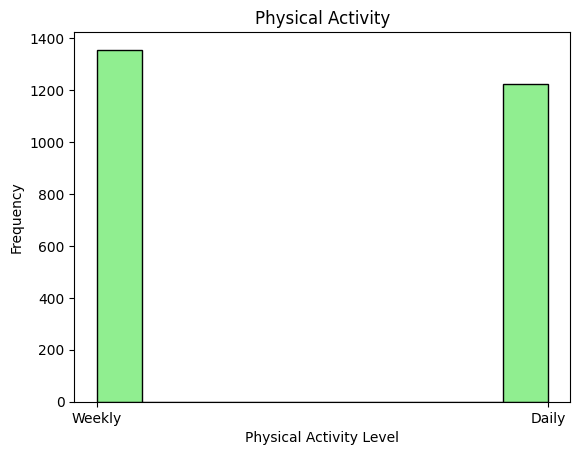

In [118]:
plt.hist(df['Physical_Activity'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Physical Activity')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

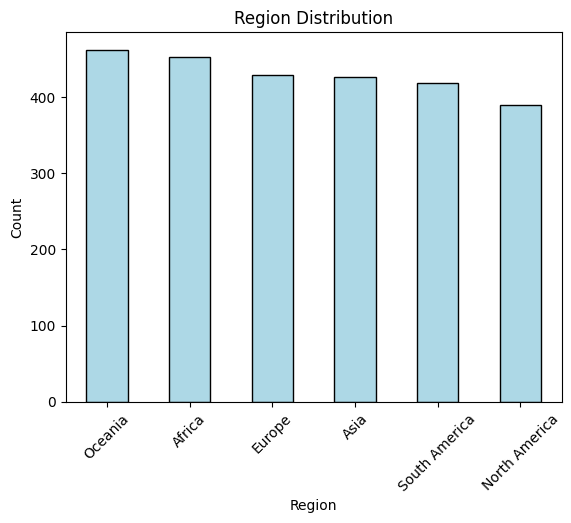

In [119]:
df['Region'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        2577 non-null   object
 1   Age                                2577 non-null   int64 
 2   Gender                             2577 non-null   object
 3   Job_Role                           2577 non-null   object
 4   Industry                           2577 non-null   object
 5   Years_of_Experience                2577 non-null   int64 
 6   Work_Location                      2577 non-null   object
 7   Hours_Worked_Per_Week              2577 non-null   int64 
 8   Number_of_Virtual_Meetings         2577 non-null   int64 
 9   Work_Life_Balance_Rating           2577 non-null   int64 
 10  Stress_Level                       2577 non-null   object
 11  Mental_Health_Condition            2577 non-null   object
 12  Access_to_M

In [121]:
# Drop Employee_ID
df = df.drop('Employee_ID', axis=1)

In [122]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to the 'Physical_Activity' column
df['Physical_Activity'] = le.fit_transform(df['Physical_Activity'])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                2577 non-null   int64 
 1   Gender                             2577 non-null   object
 2   Job_Role                           2577 non-null   object
 3   Industry                           2577 non-null   object
 4   Years_of_Experience                2577 non-null   int64 
 5   Work_Location                      2577 non-null   object
 6   Hours_Worked_Per_Week              2577 non-null   int64 
 7   Number_of_Virtual_Meetings         2577 non-null   int64 
 8   Work_Life_Balance_Rating           2577 non-null   int64 
 9   Stress_Level                       2577 non-null   object
 10  Mental_Health_Condition            2577 non-null   object
 11  Access_to_Mental_Health_Resources  2577 non-null   object
 12  Productivit

In [125]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [126]:
print(df.head())
print(df.info())

         Age             Gender        Job_Role    Industry  \
0  -0.791644         Non-binary              HR  Healthcare   
1  -0.080912             Female  Data Scientist          IT   
6  -0.880486  Prefer not to say           Sales          IT   
9  -0.969327             Female              HR          IT   
12 -0.080912             Female       Marketing  Consulting   

    Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0             -0.477010        Hybrid               0.619797   
1             -1.479012        Remote               1.040538   
6              0.625192        Remote               0.956390   
9              1.025992        Hybrid               1.461279   
12            -1.679413        Remote              -1.568056   

    Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                     -0.09727                 -0.697464       Medium   
1                     -0.75061                 -1.405088       Medium   
6                

In [127]:
print(df['Mental_Health_Condition'].unique())

['Depression' 'Anxiety' 'Burnout']


In [128]:
print(df['Mental_Health_Condition'].isnull().sum())

0


In [129]:
df = df.dropna(subset=['Mental_Health_Condition'])


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [131]:
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location',
                       'Stress_Level', 'Mental_Health_Condition',
                       'Access_to_Mental_Health_Resources',
                       'Productivity_Change', 'Satisfaction_with_Remote_Work',
                       'Sleep_Quality', 'Region']

In [132]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [133]:
# Separate features and targets
X = df_encoded.drop(['Stress_Level_Medium', 'Productivity_Change_Increase'], axis=1)
y = df_encoded[['Stress_Level_Medium', 'Productivity_Change_Increase']]  # Adjust based on your needs

In [134]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_model = MultiOutputClassifier(rf_model, n_jobs=-1)

In [137]:
multi_target_model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [138]:
y_pred = multi_target_model.predict(X_test)


In [139]:
print("Classification Report for Stress Level:")
print(classification_report(y_test['Stress_Level_Medium'], y_pred[:, 0], target_names=['Low_Stress', 'High_Stress']))

Classification Report for Stress Level:
              precision    recall  f1-score   support

  Low_Stress       0.70      0.84      0.77       510
 High_Stress       0.51      0.32      0.39       264

    accuracy                           0.66       774
   macro avg       0.61      0.58      0.58       774
weighted avg       0.64      0.66      0.64       774



In [140]:
print("\nClassification Report for Productivity Change:")
print(classification_report(y_test['Productivity_Change_Increase'], y_pred[:, 1], target_names=['Decrease_Prod', 'Increase_Prod']))


Classification Report for Productivity Change:
               precision    recall  f1-score   support

Decrease_Prod       0.73      0.88      0.80       546
Increase_Prod       0.43      0.21      0.29       228

     accuracy                           0.68       774
    macro avg       0.58      0.55      0.54       774
 weighted avg       0.64      0.68      0.65       774



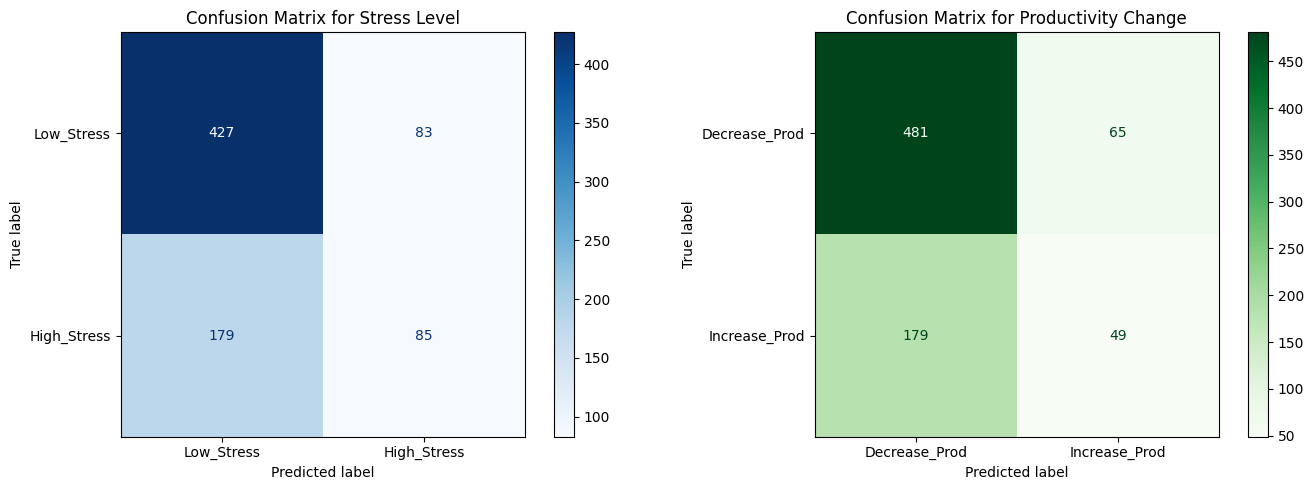

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test['Stress_Level_Medium'],
    y_pred[:, 0],
    display_labels=['Low_Stress', 'High_Stress'],
    cmap='Blues',
    ax=ax[0]
)
ax[0].set_title("Confusion Matrix for Stress Level")


# Plot confusion matrix for Productivity Change
ConfusionMatrixDisplay.from_predictions(
    y_test['Productivity_Change_Increase'],
    y_pred[:, 1],
    display_labels=['Decrease_Prod', 'Increase_Prod'],
    cmap='Greens',
    ax=ax[1]
)
ax[1].set_title("Confusion Matrix for Productivity Change")

plt.tight_layout()
plt.show()

In [151]:
from sklearn.cluster import KMeans

# تعداد خوشه‌ها
n_clusters = 3

# اجرای الگوریتم K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [143]:
from sklearn.metrics import silhouette_score

# محاسبه نمره سیلوئت
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.05377391351382272


In [144]:
from sklearn.metrics import mean_squared_error
# محاسبه MSE
mse_list = []
for i in range(n_clusters):
    cluster_points = X[y_kmeans == i]
    cluster_center = kmeans.cluster_centers_[i]
    mse = mean_squared_error(cluster_points, [cluster_center] * len(cluster_points))
    mse_list.append(mse)

print("Mean Squared Error for each cluster:")
for i, mse in enumerate(mse_list):
    print(f"Cluster {i}: MSE = {mse}")

Mean Squared Error for each cluster:
Cluster 0: MSE = 0.31369922897311814
Cluster 1: MSE = 0.29928168172501185
Cluster 2: MSE = 0.2978800155301072


In [156]:
X

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work,Physical_Activity,Gender_Male,Gender_Non-binary,...,Productivity_Change_No Change,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,-0.791644,-0.477010,0.619797,-0.097270,-0.697464,-1.443961,-1.435221,0.949655,False,True,...,False,False,True,True,False,False,True,False,False,False
1,-0.080912,-1.479012,1.040538,-0.750610,-1.405088,-0.003075,-0.718167,0.949655,False,False,...,False,True,False,True,False,True,False,False,False,False
6,-0.880486,0.625192,0.956390,-0.097270,0.010160,1.437811,-0.001113,-1.053014,False,False,...,False,False,False,False,True,True,False,False,False,False
9,-0.969327,1.025992,1.461279,-0.315050,-1.405088,-0.723518,-1.435221,0.949655,False,False,...,False,False,False,False,True,False,False,True,False,False
12,-0.080912,-1.679413,-1.568056,-0.097270,-0.697464,-0.723518,-1.435221,0.949655,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,1.695918,-0.877811,1.461279,-0.750610,-0.697464,0.717368,1.432995,0.949655,False,False,...,False,True,False,False,False,False,False,False,True,False
4992,1.251710,0.324591,0.451501,-0.097270,-0.697464,-0.723518,-0.001113,-1.053014,False,False,...,True,True,False,False,True,False,False,False,False,False
4994,-0.080912,-0.076210,1.040538,-1.403949,-0.697464,-0.003075,1.432995,-1.053014,False,False,...,False,False,False,True,False,False,False,False,True,False
4995,-0.791644,-1.378812,-1.315612,-1.186169,1.425408,0.717368,-1.435221,0.949655,True,False,...,False,False,False,False,False,True,False,False,False,False


In [157]:
# نمایش نتایج
plt.figure(figsize=(10, 6))
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(X[:, 0], X.[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.75, marker='X')
plt.title('K-Means Clustering on  Dataset')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# مرحله 6: ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')